# 📘 Model Evaluation Metrics & Unsupervised Learning

## 🧩 Part A: Model Evaluation Metrics (Supervised Learning)

### ✅ 1️⃣ Accuracy

### ✍️ What is Accuracy? 

Accuracy tells you how many predictions your model got right out of all the predictions it made.

***🔢 Formula:***

Accuracy = Correct Predictions / Total Predictions

If your model makes 100 predictions and 90 of them are correct, your accuracy is:

90 / 100 = 0.90 = 90%

### 🧠 When is Accuracy useful?

**✅ When your dataset is balanced (all classes appear equally).**

**⚠️ But it can be misleading in imbalanced datasets.**

Example: In a cancer detection dataset where only 5 out of 100 people have cancer, if the model predicts “no cancer” for everyone, accuracy is 95%! But it didn’t catch any actual cancer cases.

So accuracy alone is not always enough — that’s why we learn precision, recall, and F1-score.

**🧪 Try it out (Wine Dataset Example)**

Let’s calculate accuracy using the Wine Classification model (Decision Tree or Random Forest):

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

2. Load the Wine Dataset

In [2]:
wine_data = load_wine()
x = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
y = wine_data.target

3. Train-Test Split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

4. Train the Random Forest Model

In [4]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

5. Now calculate Accuracy

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


### ✅ 2️⃣ Precision

### ✍️ What is Precision?

Precision tells us:
Out of all the predictions the model made as a certain class (like "positive"), how many were actually correct?

📌 It answers the question:
"When the model says YES, how often is it right?"

***🔢 Formula***

Precision = TP / (TP+FP)

- TP (True Positive): Model said YES and it was actually YES

- FP (False Positive): Model said YES but it was actually NO

***📍 Real-Life Example***

Imagine a spam detector:

- If Precision is high → most emails marked as spam really are spam

- If Precision is low → many important emails are incorrectly marked as spam (bad!)

So, use Precision when False Positives are dangerous.

**🧪 Let’s calculate Precision for Wine Model**

Since this is a multi-class problem (3 wine types), we use average='macro' to calculate precision for each class and take the average.

In [6]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="macro")
print(f"Precision: {precision:.2f}")

Precision: 1.00


### ✅ 3️⃣ Recall

### ✍️ What is Recall?

Recall tells us:
“Out of all the actual positive cases, how many did the model correctly identify?”

📌 It answers the question:
"Did the model miss any real positive cases?"

***🔢 Formula***

Recall = TP / (TP+FN)

- TP (True Positive): Model said YES and it was actually YES

- FN (False Negative): Model said NO but it was actually YES

***📍 Real-Life Example***

In disease detection:

- If recall is low → the model misses sick patients

- If recall is high → it catches most actual patients

So, use Recall when False Negatives are dangerous
(e.g., cancer detection, fraud detection, safety systems)

**🧪 Let’s calculate Recall for Wine Model**

In [7]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average = "macro")
print(f"Recall: {recall:.2f}")

Recall: 1.00


### ✅ 4️⃣ F1-Score

### ✍️ What is F1-Score?

The F1-Score gives a balance between precision and recall.
It’s useful when you want to avoid both false positives and false negatives.

***🔢 Formula***

F1-Score = 2 x (Precision x Recall / Precision + Recall)

- If Precision = 1 and Recall = 1, then F1-Score = 1 ✅

- If either Precision or Recall is low, F1 will be low too ❌

***📍 Real-Life Example***

In fraud detection:

- Precision = How many flagged transactions were truly fraud?

- Recall = How many actual frauds were detected?

- F1 = How good is the balance between the two?

F1 is especially useful when classes are imbalanced.

**🧪 Let’s calculate F1-Score for Wine Model**

In [8]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average="macro")
print(f"F1-Score: {f1:.2f}")

F1-Score: 1.00


### ✅ 5️⃣ Confusion Matrix

### ✍️ What is a Confusion Matrix?

It shows how many predictions were:

- Correct (True Positives & True Negatives)

- Incorrect (False Positives & False Negatives)

In a multi-class setup (like the wine dataset with 3 classes), it shows:

- Rows = Actual classes

- Columns = Predicted classes

***📌 Why it’s useful:***

- Helps you identify which classes are being confused

- Gives a complete picture of classification performance

**🧪 Plot the Confusion Matrix for Wine model**

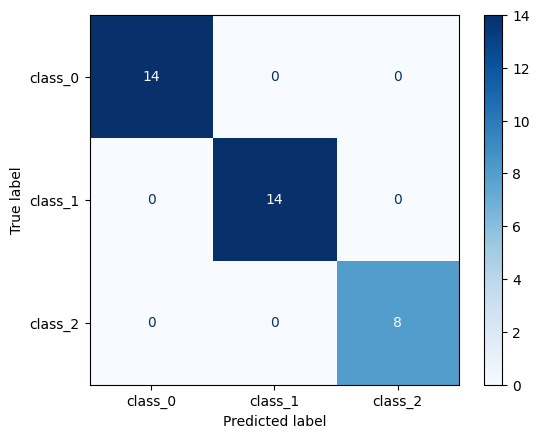

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = wine_data.target_names)
disp.plot(cmap="Blues")

confusion matrix confirms that the Random Forest model predicted **every single wine class correctly**. Here's how to interpret it:

**🔍 Confusion Matrix Breakdown**

|                    | Predicted Class 0 | Predicted Class 1 | Predicted Class 2 |
| ------------------ | ----------------- | ----------------- | ----------------- |
| **Actual Class 0** | 14 ✅              | 0 ❌               | 0 ❌               |
| **Actual Class 1** | 0 ❌               | 14 ✅              | 0 ❌               |
| **Actual Class 2** | 0 ❌               | 0 ❌               | 8 ✅               |

✅ All predictions are **on the diagonal** → this means **no class was confused with another**.

### ✅ 6️⃣ ROC Curve & AUC (Receiver Operating Characteristic)

### ✍️ What is the ROC Curve? 

It’s a graph that shows how well your model separates the classes.

It plots:

- True Positive Rate (TPR) on Y-axis = How many real positives did the model catch?

- False Positive Rate (FPR) on X-axis = How many positives it predicted were actually negative?

***🧪 Why is ROC Curve useful?***

- It tells us how performance changes with different threshold values

- Great for comparing classifiers

- Especially helpful for imbalanced datasets

***🎯 What is AUC?***

***✅ AUC = Area Under the ROC Curve***

AUC measures the entire area under the ROC curve (from 0 to 1)

- AUC = 1 → Perfect model

- AUC = 0.5 → Model is guessing randomly

- AUC closer to 1 = better classifier

**ROC AUC Score for Multi-Class (One-vs-Rest Strategy)**

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# 1. Convert actual labels (y_test) into binary format
y_test_bin = label_binarize(y_test, classes=[0,1,2])
# Example: 0 → [1,0,0], 1 → [0,1,0], 2 → [0,0,1]

# 2. Predict probabilities for each class
y_score = rf_model.predict_proba(x_test)
# Each row looks like [0.8, 0.1, 0.1] (model's confidence per class)

# 3. Calculate AUC score using macro average across all classes
auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
# 'macro' = average AUC of all classes equally
# 'ovr' = One-vs-Rest strategy used to binarize each class separately

print(f"AUC Score (Macro Average): {auc:.2f}")

AUC Score (Macro Average): 1.00


**Plotting the ROC Curve (for Multi-Class Classification)**

*Quick Recap – What are we plotting?*

For each class, we’ll draw a line that shows:

- How well it separates that class from the other two (One-vs-Rest)

- Using the predicted probabilities at different threshold

In [11]:
from sklearn.metrics import roc_curve, auc
#roc_curve: Calculates points for the ROC curve (FPR & TPR).
#auc: Computes the Area Under the Curve (AUC) from those points.

# from sklearn.preprocessing import label_binarize # done already
# import matplotlib.pyplot as plt # done already

from itertools import cycle
#Helps to cycle through different colors when plotting multiple curves (for each class).

# 1. Convert y_test to binary matrix
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1] # should be 3 for wine dataset

# 2. Get predicted probabilities
y_score = rf_model.predict_proba(x_test)#predict_proba() gives probability predictions for each class, for each test sample.

# 3. Prepare dictionaries to store metrics
fpr = dict() # False Positive Rate
tpr = dict() # True Positive Rate
roc_auc = dict() # AUC for each class

# 4. Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc_curve(y_test_bin[:, i], y_score[:, i])
# This calculates the ROC curve data:
# fpr[i]: False Positive Rates
# tpr[i]: True Positive Rates
# _: Thresholds (we don't use it here, so it's ignored with _)
# These FPR & TPR arrays are needed to plot the ROC curve for class i.

# roc_auc[i] = auc(fpr[i], tpr[i])
# This line calculates the Area Under the Curve (AUC) for class i using the FPR and TPR values you just got.
# auc() function finds how much area is covered under that ROC curve — higher is better.

**Now the Plotting Part:**

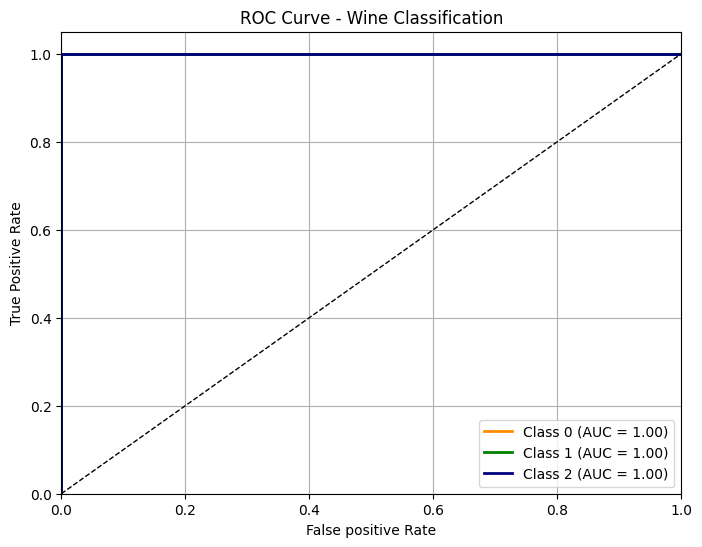

In [12]:
# 5. Set different colors for each class
colors = cycle(["darkorange", "green", "navy"]) # cycle([...]) Cycles through a list of colors for plotting

# 6. Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
            label = f"Class {i} (AUC = {roc_auc[i]:.2f})") # plt.plot(fpr[i], tpr[i], ...) Plots ROC curve line for class i

# 7. Add diagonal line (random chance baseline)
plt.plot([0,1], [0,1], "k--", lw=1) # plt.plot([0, 1], [0, 1], 'k--')	Adds diagonal line (random guess baseline) 
# 'k--' = black dashed line. # lw=1 Sets the line width to 1

# 8. Beautify the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Wine Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 🎯 Part A Wrap-Up Summary

We've now mastered **6 powerful evaluation tools** for classification:

| Metric           | Your Score            |
| ---------------- | --------------------- |
| Accuracy         | 1.00                  |
| Precision        | 1.00                  |
| Recall           | 1.00                  |
| F1-Score         | 1.00                  |
| Confusion Matrix | Perfect Prediction ✔️ |
| ROC Curve        | (Next Step)           |

## 🧩 PART B: Unsupervised Learning Basics

### ✅ Step 7: What is Unsupervised Learning?

### 🔹 Definition:

**Unsupervised learning** is a type of machine learning where the model **isn’t given any output labels.**

Instead, it tries to **find structure, patterns, or groupings** in the data on its own.

### 🧠 Difference from Supervised Learning:

| Feature              | Supervised Learning                        | Unsupervised Learning                   |
| -------------------- | ------------------------------------------ | --------------------------------------- |
| 🏷️ Labels provided? | Yes (`x` ➝ `y`)                            | No (Only `x`)                           |
| 📊 Goal              | Predict labels (classification/regression) | Discover structure (clusters, patterns) |
| 🧪 Examples          | Decision Trees, Logistic Regression        | K-Means, PCA                            |
| 🎯 Output            | Predicted class/values                     | Cluster groups, compressed features     |
| ⚙️ Learning type     | With guidance (teacher present)            | Without guidance (no teacher)           |

*💡 Real-life Analogy:*

- Supervised Learning is like learning from a teacher:
You are given questions and correct answers during practice.

- Unsupervised Learning is like being handed a mystery box of puzzles:
You explore and group similar pieces yourself to figure out what's going on.


### ✅ Step 8: K-Means Clustering

### 🔹 What is Clustering?

**Clustering** is the task of grouping data points in such a way that:

Points **within a single cluster are** similar to each other

Points **between different clusters are different**


***🔸 What is K-Means?***

**K-Means** is an algorithm that:

**1.** Divides the data into K clusters

**2.** Each cluster is centered around a point called a centroid

**3.** The algorithm tries to minimize the total **inertia** (distance between data points and their cluster centroids)


***📌 Important Terms:***

- **Centroid**: The center point of a cluster (like an average position).

- **Inertia**: Total distance of all points from their respective centroids. Lower inertia = tighter clusters.

- **K**: The number of clusters you choose. (We’ll soon learn how to choose the best K.)

**🧪 Let’s do it on Wine Data (without labels)**

In [13]:
# 1. Import required libraries
# from sklearn.datasets import load_wine # lets do it on wine data 
from sklearn.cluster import KMeans
# import pandas as pd

# 2. Load the dataset
#wine_data = load_wine() # Loads the dataset (features only; we’ll ignore target)
x = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42) # We'll assume 3 clusters for now
kmeans.fit(x)

# 4. View assigned clusters
cluster_labels = kmeans.labels_ # Gives the cluster number (0, 1, 2) assigned to each data point
print(cluster_labels)

[1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 2 2 1 2 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 2 2 2 2 2 1 2 1 2 2 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0]


### ✅ Step 8 (continued): Visualizing Clusters with PCA (for 2D plot)

Since the wine dataset has 13 features (dimensions), we can't directly visualize it. So we’ll **reduce it to 2D** using **PCA (Principal Component Analysis)** to **visualize how the K-Means clusters look**.

### 🧠 Why use PCA here?

- PCA helps **reduce high-dimensional data** into fewer dimensions.

- We’ll reduce it to **2 components** so we can **plot it on a 2D graph** and see how K-Means grouped the data.

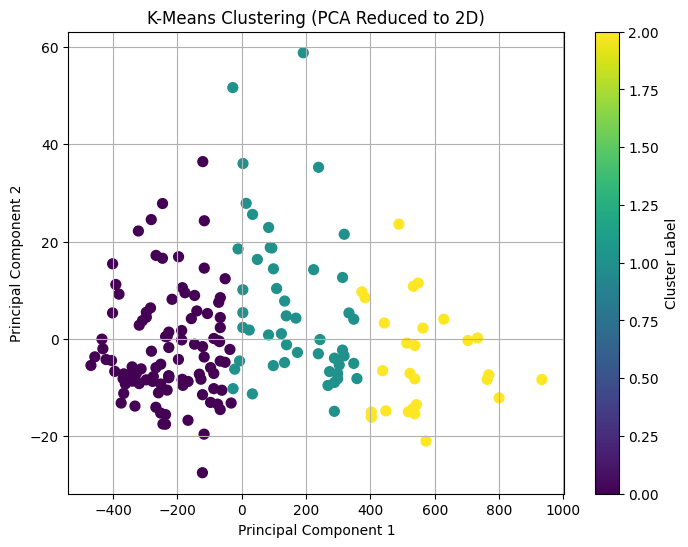

In [14]:
from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2) # Reduces the 13 features down to 2 components
x_reduced = pca.fit_transform(x) # fit_transform(x)	Fits PCA to your data and returns the reduced version

# Plot the clustered data
plt.figure(figsize=(8,6))
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=cluster_labels, cmap="viridis", s=50) # c=cluster_labels Uses cluster number (0, 1, 2) as the color for points
plt.title("K-Means Clustering (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

### 📍 What is “Inertia” in K-Means?

**Inertia** measures how **tight** the clusters are.

***📌 Intuition:***

- It’s the sum of squared distances between each data point and its assigned cluster centroid.

- Lower inertia means data points are closer to their cluster center → better clustering.

- But! If you keep increasing the number of clusters, inertia always decreases — so we need a smart way to choose the best number of clusters.

### 📈 Elbow Method – Choosing the Right K

This is where the **Elbow Method** comes in:

***🔍 How it works:***

- Try clustering for **K = 1 to 10**

- For each K, compute the **inertia**

- Plot K vs. Inertia

- Look for the "elbow" point – where inertia **stops decreasing sharply** — that's usually the best number of clusters!

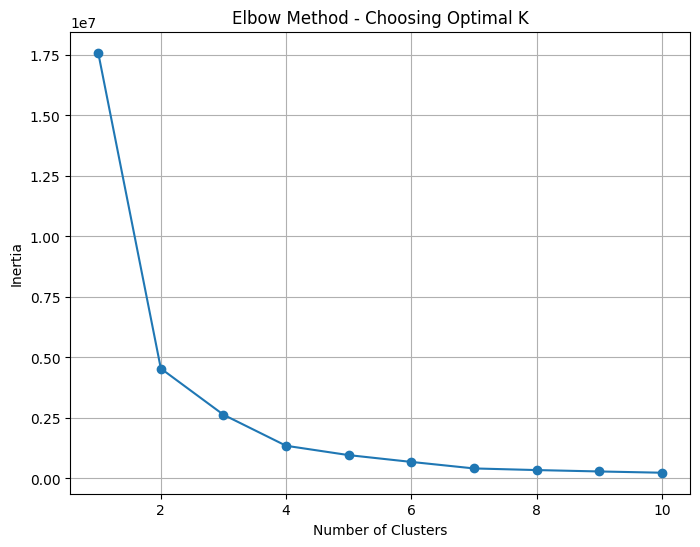

In [15]:
inertia_values = []
# inertia_values: This is an empty list that we will fill.
# It will store the inertia (cluster tightness) for each number of clusters we try (K = 1 to 10).

# Try K from 1 to 10
for k in range (1,11):
    #for: Starts a loop.
    #k: This is our number of clusters (K) that will go from 1 to 10.
    #range(1, 11): Generates numbers from 1 up to 10 (inclusive of 1, exclusive of 11).
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    # KMeans(...): This creates a KMeans clustering object.
    # n_clusters=k: Sets the current number of clusters we want to try.
    # random_state=42: Keeps the result same every time you run (for reproducibility).
    # kmeans: Stores this model in a variable called kmeans.
    
    kmeans.fit(x)
    # - .fit(x): Runs the KMeans algorithm on our dataset x.
    # - x: This contains only the features (not the labels).
    # - The algorithm:
    #     Randomly picks K centers.
    #     Assigns points to the closest center.
    #     Re-calculates centers.
    #     Repeats until clusters are stable.


    inertia_values.append(kmeans.inertia_)
    # kmeans.inertia_: This is the final inertia value after clustering.
    # Inertia = sum of squared distances between each point and its assigned cluster center.
    # .append(...): Adds that inertia to our inertia_values list.

# Plotting
plt.figure(figsize=(8,6))
# plt.figure(...): Creates a new blank plot.
# figsize=(8, 6): Sets the width and height of the figure.

plt.plot(range(1,11), inertia_values, marker="o")
# plt.plot(...): Draws a line graph.
# range(1, 11): X-axis (K values).
# inertia_values: Y-axis (how good or bad clustering is).
# marker='o': Adds round dots at each point to make it easier to see.

plt.title("Elbow Method - Choosing Optimal K")
#Sets the title of the graph to explain what it shows.

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
#Adds labels to the X and Y axes to make the graph understandable.

plt.grid(True)
# Adds a background grid to make reading the graph easier.

plt.show()

### 📌 What You Just Discovered from the Plot:

You can clearly see the "elbow" shape at K = 3, where the inertia drops sharply and then starts to flatten. That means:

K = 3 is a good choice.

After that, adding more clusters doesn’t improve the compactness much.

This supports what you had assumed earlier when using KMeans(n_clusters=3) ✅

### ✅ Recap of Key Takeaways So Far

| Concept                   | What You Did                                       |
| ------------------------- | -------------------------------------------------- |
| **Unsupervised Learning** | No labels were used, just features                 |
| **KMeans Clustering**     | Grouped similar wine samples into 3 clusters       |
| **PCA**                   | Reduced data from 13D to 2D to visualize clusters  |
| **Elbow Method**          | Used inertia to find best number of clusters (K=3) |


### Step 9: ✅ What is PCA?

**PCA (Principal Component Analysis)** is a **dimensionality reduction technique.**

Imagine you have data with many features (like 10, 20, or even 1000). PCA helps by:

- Keeping the important **patterns**

- While removing **redundant or less useful features**

- And making the data **easier to visualize** or **faster to process**

### 🎯 Why is PCA Useful?

| Benefit           | Explanation                           |
| ----------------- | ------------------------------------- |
| ✅ Simplifies data | Reduces number of features (columns)  |
| ✅ Improves speed  | Less features = faster model training |
| ✅ Helps visualize | Reduces to 2D or 3D for plotting      |
| ✅ Removes noise   | Filters out less informative patterns |

### 📉 Dimensionality Reduction Example:

Let’s say we have wine data with 13 features (alcohol, magnesium, color intensity, etc.).

We’ll use PCA to reduce it to 2 features, just for visualization.

(These 2 features are not original columns — they are new combinations that best describe the spread of the data.)

**🧪 Let’s Do PCA**

[0.99809123 0.00173592]


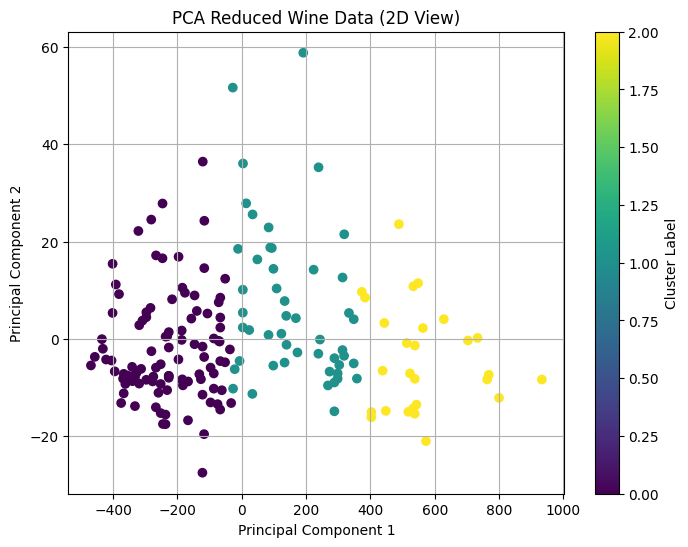

In [16]:
# Import PCA
#from sklearn.decomposition import PCA

#Apply PCA on Wine Data
pca = PCA(n_components=2) # Ask PCA to reduce to 2 components
x_pca = pca.fit_transform(x) # Fit PCA and transform the data
# PCA(n_components=2) → we want to reduce the data to 2 new features.
# fit_transform(x):
# fit() → learns the best directions (principal components)
# transform() → creates the new reduced dataset based on those directions
# x → is your input data (features only, no labels)

# See How Much Info Was Kept
print(pca.explained_variance_ratio_)
# This shows how much of the original data's information (variance) is retained by each new component.

# Visualize the Reduced Data
#import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cluster_labels, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Reduced Wine Data (2D View)")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

### 🔁 What Just Happened?

| Step                           | What You Did                            | Why It Matters                                            |
| ------------------------------ | --------------------------------------- | --------------------------------------------------------- |
| ✅ PCA                          | Reduced 13 features ➡ 2 features        | Made data visualizable and easier to process              |
| ✅ `.fit_transform(x)`          | Learned directions and transformed data | Created new "principal components"                        |
| ✅ `.explained_variance_ratio_` | Showed \[0.99, 0.0017]                  | Meaning: PC1 alone explains **\~99.8%** of data! Amazing! |
| ✅ `plt.scatter`                | Plotted clusters by PCA dimensions      | Visually shows how distinct the clusters are              |

***🎉 What This Means:***

- Even without using the class labels, KMeans + PCA helped reveal the natural groupings in the wine dataset.

- The model found 3 distinct clusters on its own — and PCA helped us see them in 2D.

- It’s clear from your plot that the clusters are nicely separated (especially thanks to the power of PCA).